# Practice Class 3 - Text classification with pytorch


Agenda: 

- What is pytorch 
- Pytorch: Autograd
- Dataset
- Indexing
- BoW
- Creating the model
- Batching and padding for BoW
- Training
- Creating the model with embedding
- Batching and padding for embedding
- Training


Note: This notebook is designed to run in sequence.

Import libraries

In [0]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from spacy.lang.es.stop_words import STOP_WORDS
from sklearn import preprocessing
import random
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from os import path


#Part 1: Pytorch



##What is PyTorch?


It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

##Getting Started
---------------

Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



Construct a 5x3 matrix, uninitialized:



In [0]:
x = torch.empty(5, 3)
print(x)

tensor([[9.3372e-38, 0.0000e+00, 4.4842e-44],
        [0.0000e+00,        nan, 3.2167e+38],
        [2.0432e+20, 1.6899e-04, 4.2469e+21],
        [1.6875e-07, 6.6646e-10, 2.6726e+23],
        [2.6196e+20, 4.2465e+21, 7.5883e+31]])


Construct a randomly initialized matrix:



In [0]:
x = torch.rand(5, 3)
print(x)

tensor([[0.4486, 0.5735, 0.0050],
        [0.8929, 0.5180, 0.9065],
        [0.9002, 0.7611, 0.8561],
        [0.0886, 0.2831, 0.7496],
        [0.3759, 0.6037, 0.3632]])


Construct a matrix filled zeros and of dtype long:



In [0]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:



In [0]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [0]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.4953,  0.0618, -0.7314],
        [-0.3911, -0.4672,  1.3973],
        [ 0.3247, -0.2843, -2.2779],
        [ 1.6778,  0.4859,  0.7947],
        [ 1.1966,  0.6109,  0.5748]])


Get its size:



In [0]:
print(x.size())

torch.Size([5, 3])


<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` is in fact a tuple, so it supports all tuple operations.</p></div>

**Operations**

There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1



In [0]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 0.7823,  0.6407, -0.5979],
        [ 0.4032,  0.5036,  2.1342],
        [ 0.4818,  0.5623, -2.1194],
        [ 1.8993,  1.3681,  1.3683],
        [ 1.6051,  1.2291,  1.3530]])


Addition: syntax 2



In [0]:
print(torch.add(x, y))

tensor([[ 0.7823,  0.6407, -0.5979],
        [ 0.4032,  0.5036,  2.1342],
        [ 0.4818,  0.5623, -2.1194],
        [ 1.8993,  1.3681,  1.3683],
        [ 1.6051,  1.2291,  1.3530]])


Addition: providing an output tensor as argument



In [0]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.7823,  0.6407, -0.5979],
        [ 0.4032,  0.5036,  2.1342],
        [ 0.4818,  0.5623, -2.1194],
        [ 1.8993,  1.3681,  1.3683],
        [ 1.6051,  1.2291,  1.3530]])


Addition: in-place



In [0]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 0.7823,  0.6407, -0.5979],
        [ 0.4032,  0.5036,  2.1342],
        [ 0.4818,  0.5623, -2.1194],
        [ 1.8993,  1.3681,  1.3683],
        [ 1.6051,  1.2291,  1.3530]])


<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

You can use standard NumPy-like indexing!



In [0]:
print(y[:, 1])

tensor([0.6407, 0.5036, 0.5623, 1.3681, 1.2291])


Resizing: If you want to resize/reshape tensor, you can use ``torch.view``:



In [0]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [0]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.3467])
-0.34665921330451965


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  `here <http://pytorch.org/docs/torch>`.

NumPy Bridge
------------

Converting a Torch Tensor to a NumPy array and vice versa.

The Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.

Converting a Torch Tensor to a NumPy Array




In [0]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [0]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


See how the numpy array changed in value.



In [0]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Converting NumPy Array to Torch Tensor

See how changing the np array changed the Torch Tensor automatically



In [0]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.



In [0]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([0.6533], device='cuda:0')
tensor([0.6533], dtype=torch.float64)



##Autograd: Automatic Differentiation


Central to all neural networks in PyTorch is the ``autograd`` package.
Let’s first briefly visit this, and we will then go to training our
first neural network.


The ``autograd`` package provides automatic differentiation for all operations
on Tensors. It is a define-by-run framework, which means that your backprop is
defined by how your code is run, and that every single iteration can be
different.

Let us see this in more simple terms with some examples.

**Tensor**


``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it starts to track all operations on it. When
you finish your computation you can call ``.backward()`` and have all the
gradients computed automatically. The gradient for this tensor will be
accumulated into ``.grad`` attribute.

To stop a tensor from tracking history, you can call ``.detach()`` to detach
it from the computation history, and to prevent future computation from being
tracked.

To prevent tracking history (and using memory), you can also wrap the code block
in ``with torch.no_grad():``. This can be particularly helpful when evaluating a
model because the model may have trainable parameters with `requires_grad=True`,
but for which we don't need the gradients.

There’s one more class which is very important for autograd
implementation - a ``Function``.

``Tensor`` and ``Function`` are interconnected and build up an acyclic
graph, that encodes a complete history of computation. Each tensor has
a ``.grad_fn`` attribute that references a ``Function`` that has created
the ``Tensor`` (except for Tensors created by the user - their
``grad_fn is None``).

If you want to compute the derivatives, you can call ``.backward()`` on
a ``Tensor``. If ``Tensor`` is a scalar (i.e. it holds a one element
data), you don’t need to specify any arguments to ``backward()``,
however if it has more elements, you need to specify a ``gradient``
argument that is a tensor of matching shape.



Create a tensor and set requires_grad=True to track computation with it



In [0]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Do an operation of tensor:



In [0]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


``y`` was created as a result of an operation, so it has a ``grad_fn``.



In [0]:
print(y.grad_fn)

Do more operations on y



In [0]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


``.requires_grad_( ... )`` changes an existing Tensor's ``requires_grad``
flag in-place. The input flag defaults to ``False`` if not given.



In [0]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


Gradients
---------
Let's backprop now


In [0]:
out.backward()

print gradients d(out)/dx




In [0]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You should have got a matrix of ``4.5``. 

Remember $out = \frac{1}{4}\sum_i z_i$ and
$z_i = 3(x_i+2)^2$.



You can also stop autograd from tracking history on Tensors
with ``.requires_grad=True`` by wrapping the code block in
``with torch.no_grad()``:



In [0]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
	print((x ** 2).requires_grad)

True
True
False


**Read Later:**

Documentation of ``autograd`` and ``Function`` is at
http://pytorch.org/docs/autograd



#Part 2: Classification

### Load data 


We will use a dataset of news from radio biobio. Load the data using pandas as pd.


In [0]:
dataset = pd.read_json(
    'https://github.com/dccuchile/CC6205/releases/download/Data/biobio_clean.bz2',
    encoding="utf-8")

In [0]:
dataset = dataset[(dataset.category =='nacional') | (dataset.category =='internacional') | (dataset.category =='economia') | (dataset.category =='sociedad') | (dataset.category =='opinion')]

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26413 entries, 0 to 26412
Data columns (total 10 columns):
author                  26411 non-null object
author_link             26413 non-null object
category                26413 non-null object
content                 26413 non-null object
embedded_links          26413 non-null object
link                    26413 non-null object
publication_datetime    26413 non-null int64
subcategory             26413 non-null object
tags                    26413 non-null object
title                   26413 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [0]:
dataset.head()

,author,author_link,category,content,embedded_links,link,publication_datetime,subcategory,tags,title
0,Yerko Roa,/lista/autores/yroa,nacional,Noticia en Desarrollo Estamos recopilando m...,[],https://www.biobiochile.cl/noticias/nacional/r...,1565778000000,region-de-valparaiso,[],Colapsa otro segmento de casa que se derrumbó ...
1,Valentina González,/lista/autores/vgonzalez,nacional,Detectives de la Policía de Investigaciones ...,[https://media.biobiochile.cl/wp-content/uploa...,https://www.biobiochile.cl/noticias/nacional/r...,1565771820000,region-metropolitana,"[#parricidio, #PDI, #Pudahuel, #Región Metropo...",Policía busca a mujer acusada de matar a su pa...
2,Felipe Delgado,/lista/autores/fdelgado,nacional,Dos detenidos fue el saldo de una serie de i...,[],https://www.biobiochile.cl/noticias/nacional/r...,1565772480000,region-metropolitana,"[#Incendio, #Liceo de Aplicación, #Región Metr...",Dos detenidos en Liceo de Aplicación: protagon...
3,Matías Vega,/lista/autores/mvega,nacional,La sala del Senado aprobó en general el proy...,[https://media.biobiochile.cl/wp-content/uploa...,https://www.biobiochile.cl/noticias/nacional/c...,1565772720000,chile,"[#Inmigración, #Inmigrantes, #Ley, #Migración,...",Apoyo transversal: Senado aprueba en general p...
4,Valentina González,/lista/autores/vgonzalez,nacional,La mañana de este miércoles se produjo una e...,[],https://www.biobiochile.cl/noticias/nacional/r...,1565772960000,region-metropolitana,"[#Carabineros, #FFEE, #Gases Lacrimógenos, #In...",Evacuación espontánea en Instituto Nacional po...


Indexing
--------------------------

The indexer takes as input a list of texts and as params *vocab_size* and *token_mincount*. The params are used in conjunction to build a vocabulary. 

*   *vocab_size* defines the size of the vocabulary if different to 0.
*   *token_mincount* defines the minimun number of appearances of a token in the dataset to be part of the vocabulary.



In [0]:
class Indexer():
    def __init__(self):
        pass
    def filter_token(self, token):
        return (not (token in STOP_WORDS)) and (len(token) >2)
        
    def fit(self, texts, vocab_size = 0, token_mincount = 0):
        tokens = [token for text in texts for token in text.lower().split() if self.filter_token(token)]
        
        counter_tokens = Counter(tokens)
        if (vocab_size > 0):
            pairs = counter_tokens.most_common(vocab_size)
        else:
            pairs = list(counter_tokens.items())

        self.vocab = list(set([token for token, count in pairs if count >= token_mincount]))
        self.vocab = set([token for token, count in pairs if count >= token_mincount])

        self.idx2token = {index:token  for index,token in enumerate(self.vocab)}
        self.token2idx = {token:index for index,token in self.idx2token.items()}

    

    def transform(self, texts):
        idxstexts = []
        for text in texts:
            indexed_text = [self.token2idx[token] for token in text.lower().split() if token in self.vocab]
            idxstexts.append(indexed_text)
        return idxstexts
        
    def Item2idx(self, item):
        return self.token2idx.get(item, -1)

    def Idx2item(self, index):
        return self.idx2token.get(index, None)


In [0]:
indexer = Indexer()
indexer.fit(["Estamos en la clase de Natural Language Processing .","La clase de Natural Language Processing es en la sala 105"],token_mincount = 2)
print(indexer.vocab)
print(indexer.idx2token)
print(indexer.token2idx)


{'natural', 'clase', 'processing', 'language'}
{0: 'natural', 1: 'clase', 2: 'processing', 3: 'language'}
{'natural': 0, 'clase': 1, 'processing': 2, 'language': 3}


Convert the labels to numbers

In [0]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(["label5","label3","label4"])
print(le.classes_)
print(labels)
print(le.inverse_transform([1,2,0]))
print(le.transform(["label5","label4"]))


['label3' 'label4' 'label5']
[2 0 1]
['label4' 'label5' 'label3']
[2 1]


In [0]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(list(dataset.category))
n_categories = len(le.classes_)
n_categories

5

Split train-test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(list(dataset.content), y, test_size=0.33, random_state=42)

Build the indexer

In [0]:
indexer = Indexer()
indexer.fit(X_train, vocab_size = 10, token_mincount = 10)
vocab_size = len(indexer.vocab)

Now we have ``category_lines``, a dictionary mapping each category
(language) to a list of lines (names). We also kept track of
``all_categories`` (just a list of languages) and ``n_categories`` for
later reference.




#Classification with Bag-of-Words 

##Turning texts into Tensors

Now that we have all the texts organized, we need to turn them into
Tensors to make any use of them.

To represent a single token, we use a "one-hot vector" of size
``<1 x vocab_size>``. A one-hot vector is filled with 0s except for a 1
at index of the current token, e.g. ``"language" = <0 1 0 0 0 ...>``.

To make a text we join a bunch of those into a tensor
``<text_length x 1 x vocab_size>``.

That extra 1 dimension is because PyTorch assumes everything is in
batches - we're just using a batch size of 1 here.




In [0]:
def tokenToIndex(token):
    return indexer.Item2idx(token)

#Convert a token to a tensor of size <1 x vocab_size>
def tokenToTensor(token):
    tensor = torch.zeros(1, vocab_size+1)
    tensor[0][tokenToIndex(token)] = 1
    return tensor

# Turn a text into a <text_length x 1 x vocab_size>,
# or an array of one-hot token vectors
def textToTensor(text):
    text_indexed = indexer.transform([text])[0] #Use the indexer to transform the text
    tensor = torch.zeros(len(text_indexed), 1, vocab_size+1) #Create the tensor
    for li, idx in enumerate(text_indexed): #Fill the tensor with a 1 at the posicion of each token in the vocabulary
        tensor[li][0][idx] = 1
    return tensor



Lets test the previous functions

In [0]:
indexer = Indexer()
indexer.fit(X_train, vocab_size = 10, token_mincount = 0)
vocab_size = len(indexer.vocab)
print(indexer.token2idx)


print(tokenToIndex('candidato'))
example = textToTensor("Donald Trump es el presidente de los Estados Unidos")
print(example)
print(example.size())

{'presidente': 0, 'millones': 1, 'personas': 2, 'país': 3, 'trump': 4, 'año': 5, 'unidos': 6, 'años': 7, 'nacional': 8, 'gobierno': 9}
-1
tensor([[[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]])
torch.Size([3, 1, 11])


A little text for torch.mean() that what we will use later

In [0]:
m = torch.mean(example,axis=0)
print(example.size())
print(m)
print(m.size())

torch.Size([3, 1, 11])
tensor([[0.3333, 0.0000, 0.0000, 0.0000, 0.3333, 0.0000, 0.3333, 0.0000, 0.0000,
         0.0000, 0.0000]])
torch.Size([1, 11])


In [0]:
print(indexer.idx2token[4])
print(indexer.idx2token[8])
print(indexer.idx2token[3])


trump
nacional
país


##Creating the Network

We will implement a feed-forward neural network. First we average the one-hot representations and pass the average to a fully conneted layer. The output is a softmax with the number of categories.




In [0]:

class Model(nn.Module):
    def __init__(self, vocab_size, num_class):
        super().__init__()
        self.fc = nn.Linear(vocab_size+1, num_class)#A fully connected layer
        self.softmax = nn.LogSoftmax()
    
    def forward(self, text):
        text = torch.mean(text,axis=0)#Average the one-hot representations.
        output = self.fc(text)
        output = self.softmax(output)
        return output

model = Model(vocab_size, n_categories)

To run this network we need to pass an input (in our case, the
Tensor for the token). We'll get back the output (probability of
each category).




In [0]:
input_token = tokenToTensor("Trump")
print(input_token.size())
output = model(input_token)
print(output.size())

torch.Size([1, 11])
torch.Size([5])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


Now lets test ``textToTensor`` instead of
``wordToTensor``. This will be further optimized by
pre-computing batches of Tensors.




In [0]:
input_text = textToTensor("Donald Trump es el presidente de los Estados Unidos")
print(input_text.size())
output = model(input_text[0])
print(output.size())

torch.Size([3, 1, 11])
torch.Size([5])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


As you can see the output is a ``<1 x n_categories>`` Tensor, where
every item is the likelihood of that category (higher is more likely).




##Training
###Preparing for Training

Before going into training we should make a few helper functions. The
first is to interpret the output of the network, which we know to be a
likelihood of each category. We can use ``Tensor.topk`` to get the index
of the greatest value:




In [0]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return le.inverse_transform([category_i]), category_i

print(categoryFromOutput(output))

(array(['sociedad'], dtype='<U13'), 4)


We will also want a quick way to get a training example (a text and its
category):




In [0]:
def randomTrainingExampleBoW():
    #sample an index
    i = random.randint(0, len(y_train) - 1)

    #take the category and the text using the index
    category = y_train[i]
    text = X_train[i]

    #make them tensors
    category_tensor = torch.tensor([category], dtype=torch.long)
    text_tensor = textToTensor(text)
    return category, text, category_tensor, text_tensor

for i in range(10):
    category, text, category_tensor, text_tensor = randomTrainingExampleBoW()
    print('category =', category, '/ text =', text)

category = 2 / text =   Los familiares de internos que se encuentran al interior de la Ex Penitenciaría están realizando una manifestación en las afueras del lugar.  El motivo de esta manifestación en por una modificación al decreto ley 321 que tiene relación la libertad condicional, cambio que están calificando como de “ilegal”.  Según denunciaron, los internos mantienen una huelga de hambre hace 14 días para exigir que se vuelva a restaurar los anteriores beneficios para postular a la libertad condicional.  De acuerdo a unos panfletos que están entregando los familiares, indican que “la modificación decreto ley 321 sobre libertad condicional alarga los tiempos de postulación , afectando no solo al preso, sino también a la familia que acompaña y es parte de este proceso de reinserción”.  “Deben respetarse las condiciones de postulación existentes al momento de ser condenados”, añadieron.  Debido a la manifestación, el tránsito estuvo interrumpido en avenida Pedro Montt con Luis Cousiñ

Training the Network
--------------------

Now all it takes to train this network is show it a bunch of examples,
have it make guesses, and tell it if it's wrong.

For the loss function ``nn.NLLLoss`` is appropriate, since the last
layer of the model is ``nn.LogSoftmax``.




Lets split the dataset again and build the indexer with a bigger vocabulary.

In [0]:
indexer = Indexer()
indexer.fit(X_train, vocab_size = 1000)
vocab_size = len(indexer.vocab)

In [0]:
model = Model(vocab_size, n_categories)

In [0]:
criterion = nn.NLLLoss()

Each loop of training will:

-  Create input and target tensors
-  Read each text in 
-  Compare final output to target
-  Back-propagate
-  Return the output and loss




In [0]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, text_tensor):

    model.zero_grad()

    output = model(text_tensor)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in model.parameters():
        p.data.add_(-learning_rate*p.grad.data)
    return output, loss.item()

Now we just have to run that with a bunch of examples. Since the
``train`` function returns both the output and loss we can print its
guesses and also keep track of loss for plotting. We print only every ``print_every`` examples, and take an
average of the loss.




In [0]:

import time
import math
def loop_training(batch = 1, example_generator=randomTrainingExampleBoW):
    plot_every = 1000//batch

    n_iters = plot_every*10
    
    # Keep track of losses for plotting
    current_loss = 0
    all_losses = []

    def timeSince(since):
        now = time.time()
        s = now - since
        m = math.floor(s / 60)
        s -= m * 60
        return '%dm %ds' % (m, s)

    start = time.time()

    for iter in range(1, n_iters + 1):
        if batch>1:
            category, text, category_tensor, text_tensor = example_generator(batch)
        else:
            category, text, category_tensor, text_tensor = example_generator()
        output, loss = train(category_tensor, text_tensor)
        current_loss += loss

        
        # Add current loss avg to list of losses
        if iter % plot_every == 0:
            all_losses.append(current_loss / plot_every)
            current_loss = 0
    return all_losses

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


CPU times: user 13.7 s, sys: 595 ms, total: 14.3 s
Wall time: 14.5 s


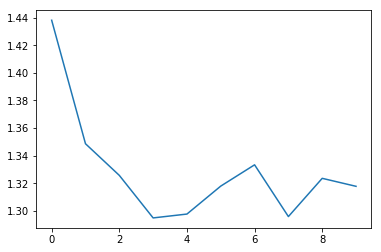

In [0]:
%%time
all_losses = loop_training(batch = 1, example_generator=randomTrainingExampleBoW)
plt.figure()
plt.plot(all_losses)

##Batch processing
Until now we trained with one example at each step. One of the reason of success of neural networks is parallel processing which is used best with batch processing.

This function creates a batch of examples with size ``<text_length x batch_size x vocab_size>``.

In [0]:
def randomTrainingBatchBoW(batch_size):
    categories = []
    texts = []

    #Select batch_size examples from (X_train,y_train)
    for _ in range(batch_size):
        i = random.randint(0, len(y_train) - 1)
        category = y_train[i]
        categories.append(category)
        
        text = X_train[i]
        texts.append(text)

    #Create the category_tensor from the categories sampled
    category_tensor = torch.tensor(categories, dtype=torch.long)
    
    #Index each text (indexer.transform() takes as input a list of texts)
    indexed_texts = indexer.transform(texts)

    #Find the longest sequence in the batch
    max_length = max([len(text) for text in indexed_texts])
    
    #Add padding the make all the sequence as long as the longest.
    indexed_texts = [text+[vocab_size]*(max_length-len(text)) for text in indexed_texts]

    #Create the tensor
    text_tensor = torch.zeros([len(indexed_texts[0]), batch_size, vocab_size+1])

    #Add the one to each position
    for i,indexed_text in enumerate(indexed_texts):
        for j,idx in enumerate(indexed_text):
            text_tensor[j][i][idx] = 1
    
    return categories, indexed_texts, category_tensor, text_tensor


###Lets train now using batches

In [0]:
model = Model(vocab_size, n_categories)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


CPU times: user 15.6 s, sys: 94.2 ms, total: 15.7 s
Wall time: 15.7 s


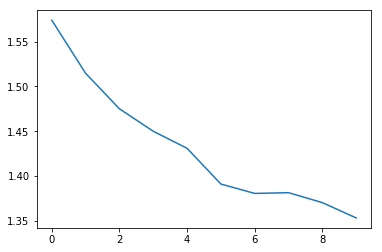

In [0]:
%%time
all_losses = loop_training(batch=10, example_generator=randomTrainingBatchBoW)
plt.figure()
plt.plot(all_losses)

Classification with embeddings

##Creating the Network
This network is veru similar to the previous one. The only difference is that we add an embedding layer as first step. Then we do the same processing, fully connected and softmax.

In [0]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size+1, embed_dim)#The embedding layer
        self.fc = nn.Linear(embed_dim, num_class)#A fully connected layer
        self.softmax = nn.LogSoftmax()


    def forward(self, text):
        embedded = self.embedding(text)
        embedded = torch.mean(embedded,axis=0)#Average the embeddings representation.
        output = self.fc(embedded)
        output = self.softmax(output)

        return output

        
n_hidden = 128
model = Model(vocab_size, n_hidden, n_categories)

###Training



In [0]:
def randomTrainingExampleEmb():
    i = random.randint(0, len(y_train) - 1)
    category = y_train[i]

    text = X_train[i]

    category_tensor = torch.tensor([category], dtype=torch.long)
    
    indexed_text = indexer.transform([text])[0]
    #Here it is different to the one that we used for BoW
    text_tensor = torch.zeros([len(indexed_text),1],dtype=torch.long)#Before it was torch.zeros(len(text_indexed), 1, vocab_size+1)

    #Here it is different to the one that we used for BoW
    for i,idx in enumerate(indexed_text):
        text_tensor[i][0] = idx #Before it was tensor[li][0][idx] = 1
    
    return category, text, category_tensor, text_tensor

for i in range(10):
    category, text, category_tensor, text_tensor = randomTrainingExampleEmb()
    print(text_tensor.size())
    print('category =', category, '/ text =', text)

torch.Size([35, 1])
category = 1 / text =   La jornada de este viernes dos tiroteos paralelos afectaron mezquitas en la ciudad de Christchurch en Nueva Zelanda.  Según la prensa local, al menos seis personas murieron , mientras que una gran cantidad quedó con heridas. Cifra que podría aumentar en el transcurso de la jornada        Tiroteos paralelos en dos mezquitas de Nueva Zelanda dejan gran cantidad de muertos    La policía neozelandesa encontró artefactos explosivos luego de los tiroteos señalaron medios internacionales.  Se trataría de bombas caseras que fueron localizadas en los automóviles en los que se movilizaban los atacantes, las que posteriormente fueron desactivadas por personal especializado.  Al menos cuatro personas se encuentran detenidas por los tiroteos.  “Cuatro personas están bajo custodia, tres hombres y una mujer”, dijo el comisionado de policía Mike Bush, quien confirmó el hallazgo de los explosivos.        Policía neozelandesa anuncia captura de cuatro sospecho

Training the Network
--------------------

Now all it takes to train this network is show it a bunch of examples,
have it make guesses, and tell it if it's wrong.

For the loss function ``nn.NLLLoss`` is appropriate, since the last
layer of the RNN is ``nn.LogSoftmax``.




In [0]:
embedding_size = 128
model = Model(vocab_size, embedding_size, n_categories)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


CPU times: user 16.9 s, sys: 1.42 s, total: 18.3 s
Wall time: 18.6 s


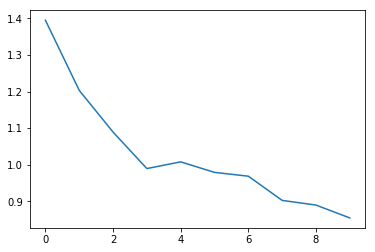

In [0]:
%%time
all_losses = loop_training(batch=True, example_generator=randomTrainingExampleEmb)
plt.figure()
plt.plot(all_losses)

###Batch processing
Same to previously, lets bachify.

This function creates a batch of examples with size ``<text_length x batch_size>``.

In [0]:
def randomTrainingBatchEmb(batch_size):
    categories = []
    texts = []
    for _ in range(batch_size):
        i = random.randint(0, len(y_train) - 1)
        category = y_train[i]
        categories.append(category)
        
        text = X_train[i]
        texts.append(text)
    
    category_tensor = torch.tensor(categories, dtype=torch.long)
    
    indexed_texts = indexer.transform(texts)
    max_length = max([len(text) for text in indexed_texts])
    indexed_texts = [text+[vocab_size]*(max_length-len(text)) for text in indexed_texts]


    text_tensor = torch.zeros([len(indexed_texts[0]),batch_size],dtype=torch.long)

    for i,indexed_text in enumerate(indexed_texts):
        for j,idx in enumerate(indexed_text):
            text_tensor[j][i] = idx
    
    return categories, indexed_texts, category_tensor, text_tensor, 

category, text, category_tensor, text_tensor = randomTrainingBatchEmb(10)
print(text_tensor.size())

print('category =', category)
print('text =', text)

torch.Size([226, 10])
category = [2, 4, 4, 1, 2, 2, 1, 2, 2, 1]
text = [[814, 562, 919, 690, 796, 659, 764, 401, 491, 814, 764, 678, 349, 796, 814, 753, 162, 859, 886, 128, 234, 830, 488, 491, 311, 227, 764, 872, 271, 229, 244, 537, 348, 606, 764, 335, 305, 418, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,

In [0]:
model = Model(vocab_size, embedding_size, n_categories)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


CPU times: user 15.1 s, sys: 198 ms, total: 15.3 s
Wall time: 15.4 s


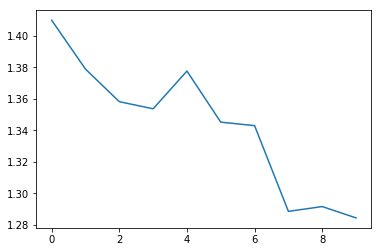

In [0]:
%%time
all_losses = loop_training(batch=10, example_generator=randomTrainingBatchEmb)
plt.figure()
plt.plot(all_losses)

## Credits

The news text documents belong to [Biobio Chile](https://www.biobiochile.cl/), [licence Creative Commons (CC-BY-NC)](https://creativecommons.org/licenses/by-nc/2.0/cl/).

Part of the code developed is extracted from 


*   [https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html)
*   [https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)
*   [https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)

## Additional material
For additional references visit [https://pytorch.org/tutorials/](https://pytorch.org/tutorials/).